In [12]:
import csv #Read and write Csv files
import os #Operating system module
import pandas as pd #Data analysis library tools
import numpy as np #Scientific computing module
import matplotlib.pyplot as plt #Plot data visualisation
%matplotlib inline
os.chdir("C:\\Users\\bizet\\Desktop\\Data Science Club")
Df = list(csv.reader(open("full_data.csv","r")))
print(Df[0:5])

[['', 'year', 'month', 'intent', 'police', 'sex', 'age', 'race', 'hispanic', 'place', 'education'], ['1', '2012', '01', 'Suicide', '0', 'M', '34', 'Asian/Pacific Islander', '100', 'Home', 'BA+'], ['2', '2012', '01', 'Suicide', '0', 'F', '21', 'White', '100', 'Street', 'Some college'], ['3', '2012', '01', 'Suicide', '0', 'M', '60', 'White', '100', 'Other specified', 'BA+'], ['4', '2012', '02', 'Suicide', '0', 'M', '64', 'White', '100', 'Home', 'BA+']]


# Removing the Headers

In [13]:
Headers = Df[0]
Data = Df[1:]
print(Data[0:5])
print(len(Data))

[['1', '2012', '01', 'Suicide', '0', 'M', '34', 'Asian/Pacific Islander', '100', 'Home', 'BA+'], ['2', '2012', '01', 'Suicide', '0', 'F', '21', 'White', '100', 'Street', 'Some college'], ['3', '2012', '01', 'Suicide', '0', 'M', '60', 'White', '100', 'Other specified', 'BA+'], ['4', '2012', '02', 'Suicide', '0', 'M', '64', 'White', '100', 'Home', 'BA+'], ['5', '2012', '02', 'Suicide', '0', 'M', '31', 'White', '100', 'Other specified', 'HS/GED']]
100798


# Exploring Gundeath by year from 2012 to 2014...

{'2012': 33563, '2013': 33636, '2014': 33599}


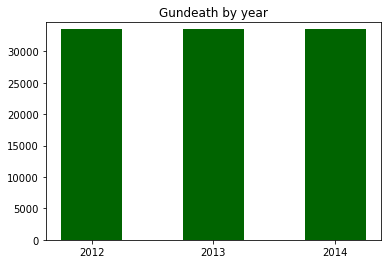

In [22]:
Years = [] #Creating an empty list

for row in Data: 
    Years.append(row[1])
    
year_counts = {} #Creating an empty dictionary

for row in Years:
    if row not in year_counts:
        year_counts[row] = 1
    else:
        year_counts[row] = year_counts[row] + 1
print(year_counts)

X = np.arange(len(year_counts))
plt.bar(X, year_counts.values(), align='center', width=0.5, color="DarkGreen" )
plt.xticks(X, year_counts.keys())
ymax = max(year_counts.values()) + 1000
plt.title('Gundeath by year')
plt.ylim(0, ymax)
plt.show()

# Exploring Overall Gundeath By Gender and Race...


{'M': 86349, 'F': 14449}
85.66539018631322
{'Asian/Pacific Islander': 1326, 'White': 66237, 'Native American/Native Alaskan': 917, 'Black': 23296, 'Hispanic': 9022}


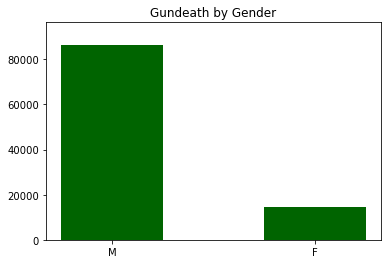

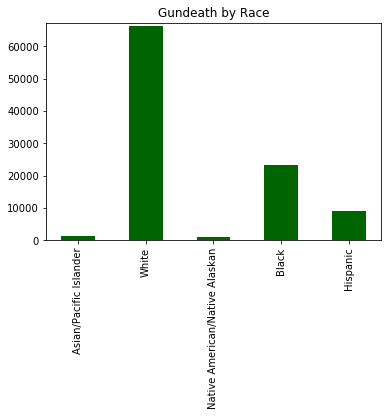

In [15]:
Gender_count = {}
for i in Data:
    if i[5] not in Gender_count:
        Gender_count[i[5]] = 1
    else:
        Gender_count[i[5]] += 1
Race_count = {}
for i in Data:
    if i[7] not in Race_count:
        Race_count[i[7]] = 1
    else:
        Race_count[i[7]] += 1
print(Gender_count)
print((86349/100798)*100)
print(Race_count)


X = np.arange(len(Gender_count))
plt.bar(X, Gender_count.values(), align='center', width=0.5, color="DarkGreen")
plt.xticks(X, Gender_count.keys())
ymax = max(Gender_count.values()) + 10000
plt.title('Gundeath by Gender')
plt.ylim(0, ymax)
plt.show()

X = np.arange(len(Race_count))
plt.bar(X, Race_count.values(), align='center', width=0.5, color="DarkGreen")
plt.xticks(X, Race_count.keys())
ymax = max(Race_count.values()) + 1000
plt.xticks(rotation=90)
plt.title('Gundeath by Race')
plt.ylim(0, ymax)
plt.show()

# Correlating with US Total Population...

In [16]:
Census = list(csv.reader(open("Census.csv","r")))
#Mergin Data

TotalPopulation = 308745538

percentage_per_year = {}
for i,v in year_counts.items():
    percentage_per_year[i] = (v/TotalPopulation)*100
#print(percentage_per_year)

mapping = {
    'Asian/Pacific Islander': 15834141,
    'Black': 40250635,
    'Hispanic': 44618105,
    'Native American/Native Alaskan': 3739506,
    'White': 197318956}

white_gun_death_rate = 66237 / 197318956
white_gun_death_rate

0.0003356849303419181

Result very small number, we are going to express it with the "rate per 100K" 
tells the number of people in a given group out of every 100K.

{'Asian/Pacific Islander': 8.374309664161762, 'White': 33.56849303419181, 'Native American/Native Alaskan': 24.521955573811088, 'Black': 57.8773477735196, 'Hispanic': 20.220491210910907}


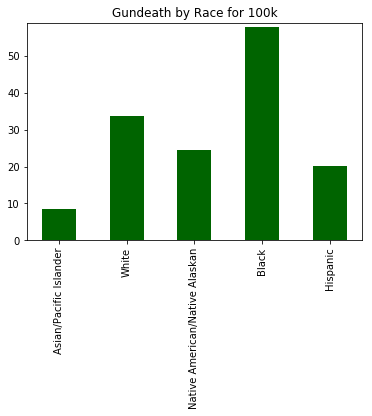

In [17]:
race_per_hundredk = {}
for k,v in Race_count.items():
    race_per_hundredk[k] = (v / mapping[k]) * 100000
print(race_per_hundredk)

X = np.arange(len(race_per_hundredk))
plt.bar(X, race_per_hundredk.values(), align='center', width=0.5, color="DarkGreen")
plt.xticks(X, race_per_hundredk.keys())
ymax = max(race_per_hundredk.values()) + 1
plt.xticks(rotation=90)
plt.title('Gundeath by Race for 100k')
plt.ylim(0, ymax)
plt.show()

# Filtering by Intent


{'Asian/Pacific Islander': 3.530346230970155, 'White': 4.6356417981453335, 'Native American/Native Alaskan': 8.717729026240365, 'Black': 48.471284987180944, 'Hispanic': 12.627161104219914}


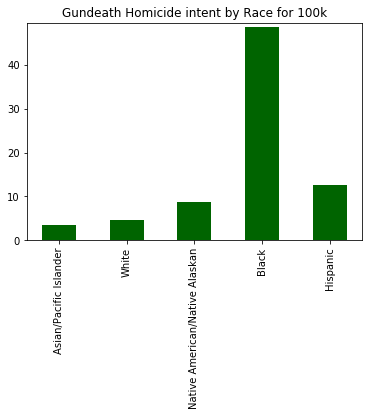

In [18]:
intents = []
for i in Data:
    intents.append(i[3]) #Isolating Intente
races = []
for i in Data:
    races.append(i[7]) #Isolating Race

homicide_race_counts = {}
for i,race in enumerate(races): #loop through each item in race and intents at the same time
    if race not in homicide_race_counts:
        homicide_race_counts[race] = 0
    if intents[i] == "Homicide":
        homicide_race_counts[race] += 1

raceHomicide_per_hundredk = {}
for k,v in homicide_race_counts.items():
    raceHomicide_per_hundredk[k] = (v / mapping[k]) * 100000

print(raceHomicide_per_hundredk)

X = np.arange(len(raceHomicide_per_hundredk))
plt.bar(X, raceHomicide_per_hundredk.values(), align='center', width=0.5, color="DarkGreen")
plt.xticks(X, raceHomicide_per_hundredk.keys())
ymax = max(raceHomicide_per_hundredk.values()) + 1
plt.title('Gundeath Homicide intent by Race for 100k')
plt.xticks(rotation=90)
plt.ylim(0, ymax)
plt.show()

 # To go Further...
 
 From our data...
 - Exploring By Month and Year
 (Seasonality)
 - correlation with the level of education
 - correlation with the location
 - Police officer involment
 

In [19]:
import datetime

dates = [datetime.datetime(year=int(row[1]), month=int(row[2]), day=1) for row in Data]
dates[:5]

[datetime.datetime(2012, 1, 1, 0, 0),
 datetime.datetime(2012, 1, 1, 0, 0),
 datetime.datetime(2012, 1, 1, 0, 0),
 datetime.datetime(2012, 2, 1, 0, 0),
 datetime.datetime(2012, 2, 1, 0, 0)]

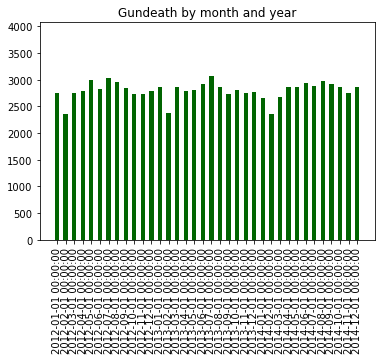

In [20]:
date_counts = {}

for date in dates:
    if date not in date_counts:
        date_counts[date] = 0
    date_counts[date] += 1

X = np.arange(len(date_counts))
plt.bar(X, date_counts.values(), align='center', width=0.5, color="DarkGreen" )
plt.xticks(X, date_counts.keys())
ymax = max(date_counts.values()) + 1000
plt.title('Gundeath by month and year')
plt.ylim(0, ymax)
plt.xticks(rotation=90)
plt.show()

observe a drop below 2500 death around April.

# Homicide by Gender

In [21]:
genders = []
for i in Data:
    genders.append(i[5])
    
homicide_gender_counts = {}
for i,gender in enumerate(genders):
    if gender not in homicide_gender_counts:
        homicide_gender_counts[gender] = 0
    if intents[i] == "Homicide":
        homicide_gender_counts[gender] += 1

print(homicide_gender_counts)

suicide_gender_counts = {}
for i,gender in enumerate(genders):
    if gender not in suicide_gender_counts:
        suicide_gender_counts[gender] = 0
    if intents[i] == "Suicide":
        suicide_gender_counts[gender] += 1

print(suicide_gender_counts)

Homicide_gender_percentage = (5373/(29803+5373))*100
Suicide_gender_percentage = (8689/(54486+8689))*100

print(Homicide_gender_percentage)
print(Suicide_gender_percentage)

{'M': 29803, 'F': 5373}
{'M': 54486, 'F': 8689}
15.274619058448943
13.753858330035614
